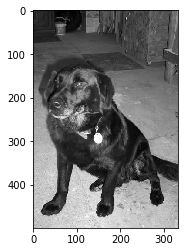

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/Users/calum/Developer/Machine Learning/Deep Learning/Cats and Dogs/kagglecatsanddogs_3367a/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break

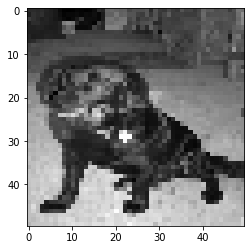

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [02:28<00:00, 84.43it/s]24946



In [5]:
import random

random.shuffle(training_data)

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[68]
   [67]
   [47]
   ...
   [57]
   [54]
   [63]]

  [[64]
   [51]
   [42]
   ...
   [35]
   [48]
   [30]]

  [[67]
   [48]
   [47]
   ...
   [46]
   [31]
   [29]]

  ...

  [[41]
   [41]
   [40]
   ...
   [56]
   [60]
   [57]]

  [[41]
   [42]
   [43]
   ...
   [63]
   [55]
   [57]]

  [[40]
   [42]
   [42]
   ...
   [60]
   [57]
   [54]]]]


In [7]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()